In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# import dataset
df = pd.read_csv("ibm-common-stock-closing-prices.csv")

In [3]:
df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [4]:
df.rename(columns= {"IBM common stock closing prices": "Closing"})

,Date,Closing
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50
...,...,...
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00


In [5]:
df.drop(1008)

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50
...,...,...
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00


In [6]:
df.rename(columns= {"IBM common stock closing prices": "Closing"}, inplace=True)

In [7]:
df.tail(10)

,Date,Closing
999,1965-12-20,501.75
1000,1965-12-21,506.75
1001,1965-12-22,505.75
1002,1965-12-23,499.00
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00
1008,IBM common stock closing prices,NaN


In [8]:
df.drop(1008, inplace=True)

In [9]:
df.tail(10)

,Date,Closing
998,1965-12-17,498.50
999,1965-12-20,501.75
1000,1965-12-21,506.75
1001,1965-12-22,505.75
1002,1965-12-23,499.00
1003,1965-12-27,500.00
1004,1965-12-28,502.25
1005,1965-12-29,498.00
1006,1965-12-30,500.00
1007,1965-12-31,499.00


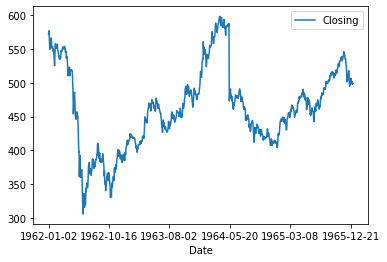

In [10]:
df.plot(x="Date", y="Closing");

In [11]:
df["Date"]

0       1962-01-02
1       1962-01-03
2       1962-01-04
3       1962-01-05
4       1962-01-08
           ...    
1003    1965-12-27
1004    1965-12-28
1005    1965-12-29
1006    1965-12-30
1007    1965-12-31
Name: Date, Length: 1008, dtype: object

In [12]:
df["Date"] = df["Date"].astype("datetime64[ns]")

In [13]:
df["Date"]

0      1962-01-02
1      1962-01-03
2      1962-01-04
3      1962-01-05
4      1962-01-08
          ...    
1003   1965-12-27
1004   1965-12-28
1005   1965-12-29
1006   1965-12-30
1007   1965-12-31
Name: Date, Length: 1008, dtype: datetime64[ns]

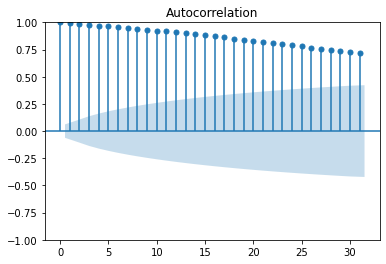

In [14]:
plot_acf(df["Closing"]);

C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


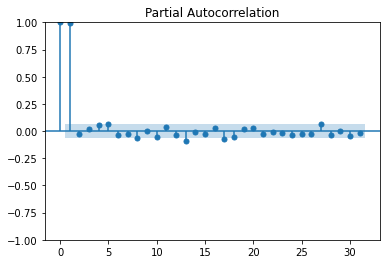

In [15]:
plot_pacf(df["Closing"]);

In [16]:
# order = (p, d, q) p=1 from pacf, q=0 from acf, we have no d yet
model = SARIMAX(df["Closing"], order=(1, 0, 0)).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Closing   No. Observations:                 1008
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3349.383
Date:                Thu, 27 Feb 2025   AIC                           6702.767
Time:                        18:02:08   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   2018.790      0.000       0.999       1.001
sigma2        44.6602      0.376    118.645      0.000      43.922      45.398
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):            315436.94
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -5.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

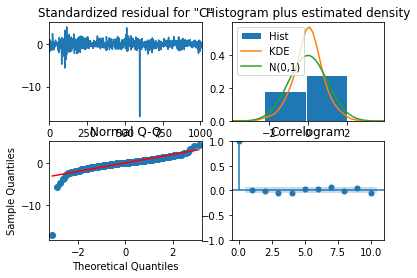

In [18]:
model.plot_diagnostics();

In [19]:
forecast_values = model.get_forecast(steps=10)

In [20]:
forecast_values.predicted_mean

1008    498.960677
1009    498.921357
1010    498.882039
1011    498.842725
1012    498.803415
1013    498.764107
1014    498.724802
1015    498.685501
1016    498.646202
1017    498.606907
Name: predicted_mean, dtype: float64

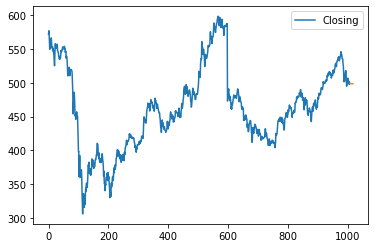

In [21]:
df.plot(y="Closing")
forecast_values.predicted_mean.plot();

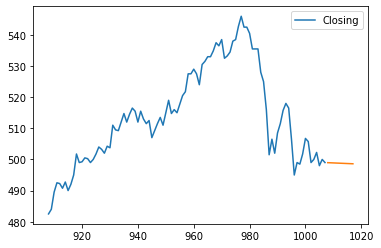

In [22]:
df.iloc[-100:].plot(y="Closing")
forecast_values.predicted_mean.plot();

In [23]:
int(df.shape[0]*.7)

705

In [24]:
train = df["Closing"].iloc[:int(df.shape[0]*.7)]
test = df["Closing"].iloc[int(df.shape[0]*.7):]

In [25]:
train.shape

(705,)

In [26]:
test.shape

(303,)

In [27]:
train.tail()

700    428.0
701    421.0
702    422.0
703    425.5
704    431.0
Name: Closing, dtype: float64

In [28]:
test.head()

705    428.00
706    424.25
707    424.50
708    423.00
709    421.38
Name: Closing, dtype: float64

In [29]:
model = SARIMAX(train, order=(1,0,0)).fit()

In [30]:
forecast_values = model.get_forecast(int(df.shape[0]*.3))

<AxesSubplot:>

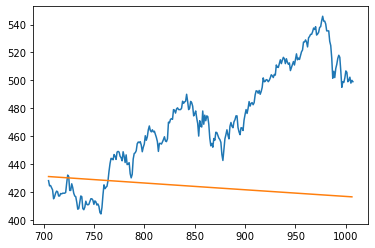

In [31]:
test.plot()
forecast_values.predicted_mean.plot()

## AIC

In [32]:
model = SARIMAX(df["Closing"], order=(1, 0, 0)).fit()

In [33]:
model.aic

6702.7667123536585

### Grid Search

We try several different parameter combinations to see which gives the best result

In [35]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append((SARIMAX(df["Closing"], order=(p, 0, q)).fit().aic, p, q))

C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregress

In [37]:
aicVals.sort()

In [38]:
aicVals

[(6700.318604236381, 3, 2),
 (6701.284442772525, 3, 3),
 (6701.8227082251, 4, 2),
 (6702.7667123536585, 1, 0),
 (6704.704834164175, 1, 1),
 (6704.705793017193, 2, 0),
 (6705.736905660842, 2, 1),
 (6706.639486799739, 3, 0),
 (6706.78731350727, 4, 0),
 (6706.955582062123, 1, 3),
 (6707.079012784592, 1, 4),
 (6707.692088624966, 1, 2),
 (6707.728880488221, 2, 2),
 (6707.946244863935, 2, 4),
 (6708.104824276587, 3, 1),
 (6709.181752529168, 2, 3),
 (6709.831490979808, 3, 4),
 (6710.081840929299, 4, 1),
 (6712.166423383659, 4, 3),
 (6714.103753785297, 4, 4),
 (12462.53432330407, 0, 4),
 (12638.255646046453, 0, 2),
 (12662.822137608124, 0, 3),
 (13891.07100973621, 0, 1),
 (15252.473753230288, 0, 0)]

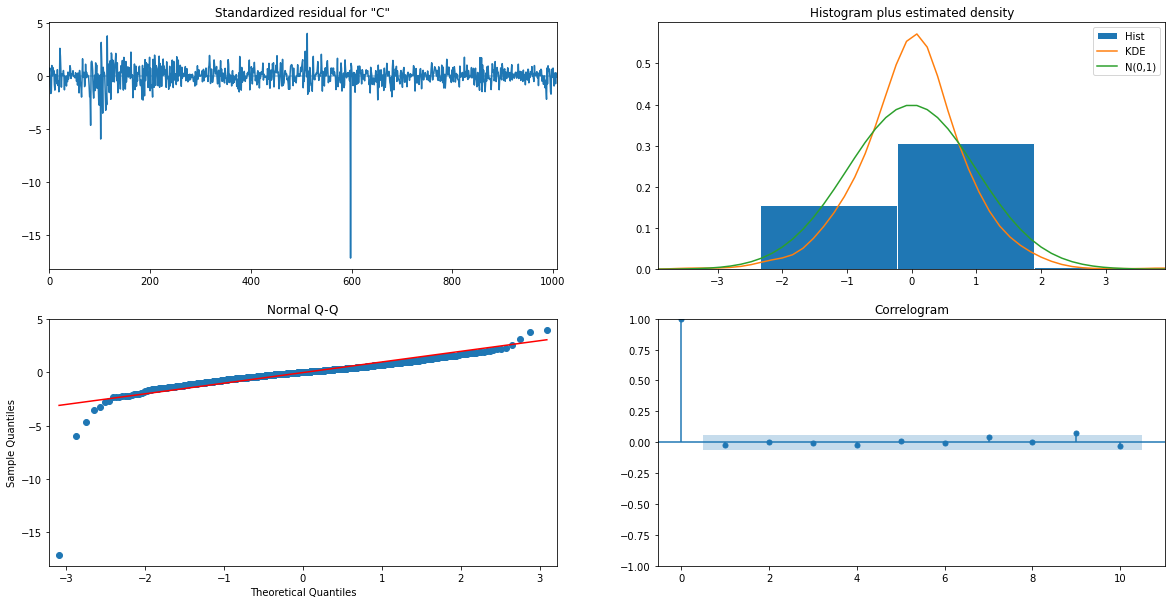

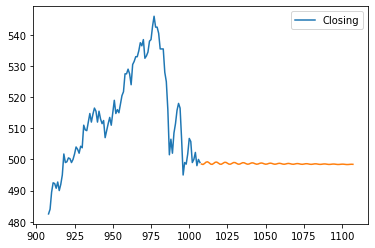

In [43]:
model = SARIMAX(df["Closing"], order=(3, 0, 2)).fit()
model.plot_diagnostics(figsize=(20, 10));
forecast_values = model.get_forecast(steps=100)
df.iloc[-100:].plot(y="Closing")
forecast_values.predicted_mean.plot();

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
adfuller(df["Closing"])

(-2.1718874320881816,
 0.21660642093507831,
 0,
 1007,
 {'1%': -3.436860474327014,
  '5%': -2.8644144230916537,
  '10%': -2.568300476140699},
 6533.2814803891915)

In [50]:
df["Closing"]

0       572.00
1       577.00
2       571.25
3       560.00
4       549.50
         ...  
1003    500.00
1004    502.25
1005    498.00
1006    500.00
1007    499.00
Name: Closing, Length: 1008, dtype: float64

In [53]:
df["Closing"].diff(1).dropna()

1        5.00
2       -5.75
3      -11.25
4      -10.50
5        6.50
        ...  
1003     1.00
1004     2.25
1005    -4.25
1006     2.00
1007    -1.00
Name: Closing, Length: 1007, dtype: float64

In [55]:
adfuller(df["Closing"].diff(1).dropna())

(-31.454722927705877,
 0.0,
 0,
 1006,
 {'1%': -3.436866962597422,
  '5%': -2.864417284603703,
  '10%': -2.5683020002450507},
 6531.589028694549)

<AxesSubplot:>

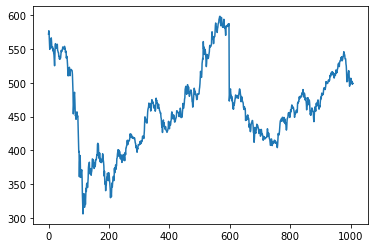

In [67]:
df["Closing"].plot()

<AxesSubplot:>

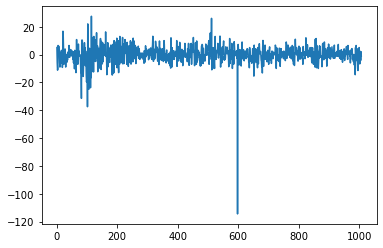

In [56]:
df["Closing"].diff(1).dropna().plot()

In [59]:
minval = df["Closing"].diff(1).dropna().min()

In [60]:
diff_df = df["Closing"].diff(1).dropna()

In [63]:
pd.DataFrame(diff_df)

,Closing
1,5.00
2,-5.75
3,-11.25
4,-10.50
5,6.50
...,...
1003,1.00
1004,2.25
1005,-4.25
1006,2.00


In [64]:
diff_df[ pd.DataFrame(diff_df)["Closing"] == minval ]

598   -114.5
Name: Closing, dtype: float64

In [66]:
df.iloc[590:600]

,Date,Closing
590,1964-05-06,584.00
591,1964-05-07,583.25
592,1964-05-08,584.50
593,1964-05-11,584.00
594,1964-05-12,586.50
595,1964-05-13,587.25
596,1964-05-14,584.50
597,1964-05-15,587.50
598,1964-05-18,473.00
599,1964-05-19,478.00


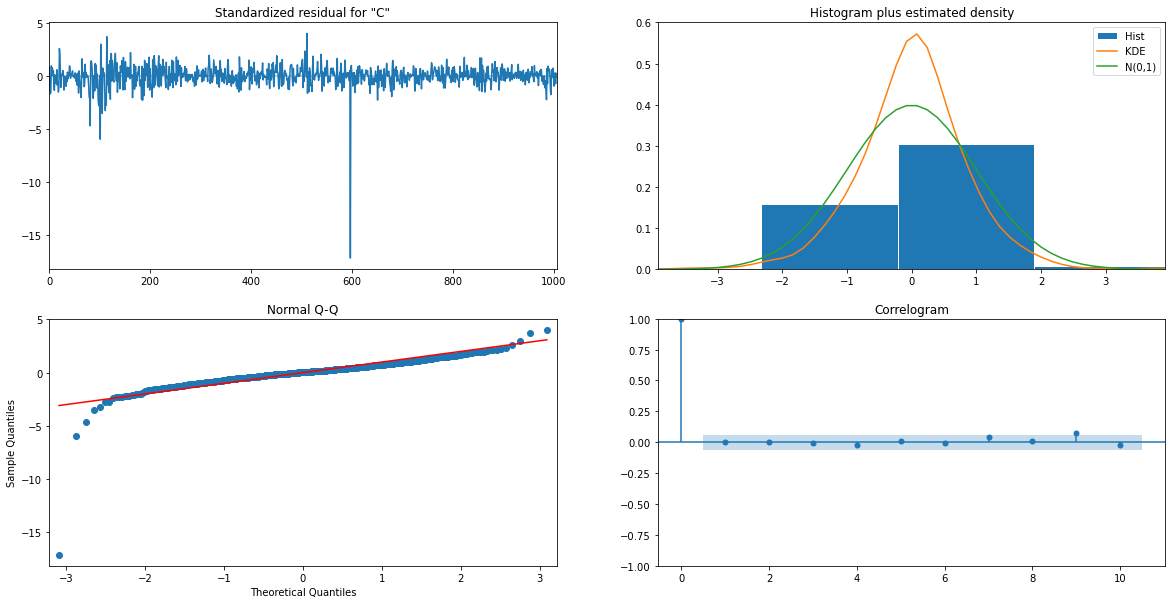

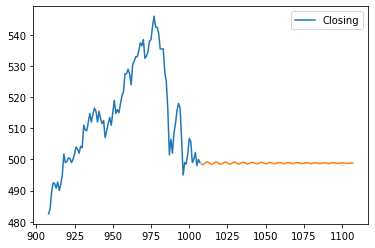

In [68]:
model = SARIMAX(df["Closing"], order=(3, 1, 2)).fit()
model.plot_diagnostics(figsize=(20, 10));
forecast_values = model.get_forecast(steps=100)
df.iloc[-100:].plot(y="Closing")
forecast_values.predicted_mean.plot();

In [70]:
aicVals = []
for p in range(5):
    for d in range(5):
        for q in range(5):
            aicVals.append((SARIMAX(df["Closing"], order=(p, d, q)).fit(maxiter=300).aic, p, d, q))

C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C

C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

In [71]:
aicVals.sort()
aicVals

[(6679.246835642723, 4, 1, 4),
 (6682.3423793547245, 2, 1, 2),
 (6683.022602419708, 2, 1, 3),
 (6683.022637772934, 3, 1, 2),
 (6685.022631844264, 4, 1, 2),
 (6685.406521867297, 0, 1, 0),
 (6685.539380812568, 3, 1, 3),
 (6685.546604222791, 2, 2, 3),
 (6685.862626002716, 4, 1, 3),
 (6685.889874198741, 3, 1, 4),
 (6687.345464345444, 0, 1, 1),
 (6687.34641712228, 1, 1, 0),
 (6688.150790846934, 0, 2, 1),
 (6688.509640389584, 3, 2, 3),
 (6689.171717158875, 4, 1, 0),
 (6689.279282553811, 2, 1, 0),
 (6689.283344901232, 0, 1, 2),
 (6689.345810356976, 1, 1, 1),
 (6689.423284161028, 3, 1, 0),
 (6689.591482740219, 0, 1, 3),
 (6689.7131426630085, 0, 1, 4),
 (6689.744458240872, 4, 1, 1),
 (6690.128665584025, 0, 2, 2),
 (6690.128892271112, 1, 2, 1),
 (6690.248745967099, 3, 2, 4),
 (6690.370115257329, 1, 1, 4),
 (6690.433649561052, 2, 1, 1),
 (6690.530787998825, 1, 1, 2),
 (6690.619571322275, 4, 2, 1),
 (6690.6327227006905, 3, 1, 1),
 (6690.984193579125, 2, 2, 4),
 (6690.99873738223, 1, 1, 3),
 (6691.

C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\envs\Sam1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


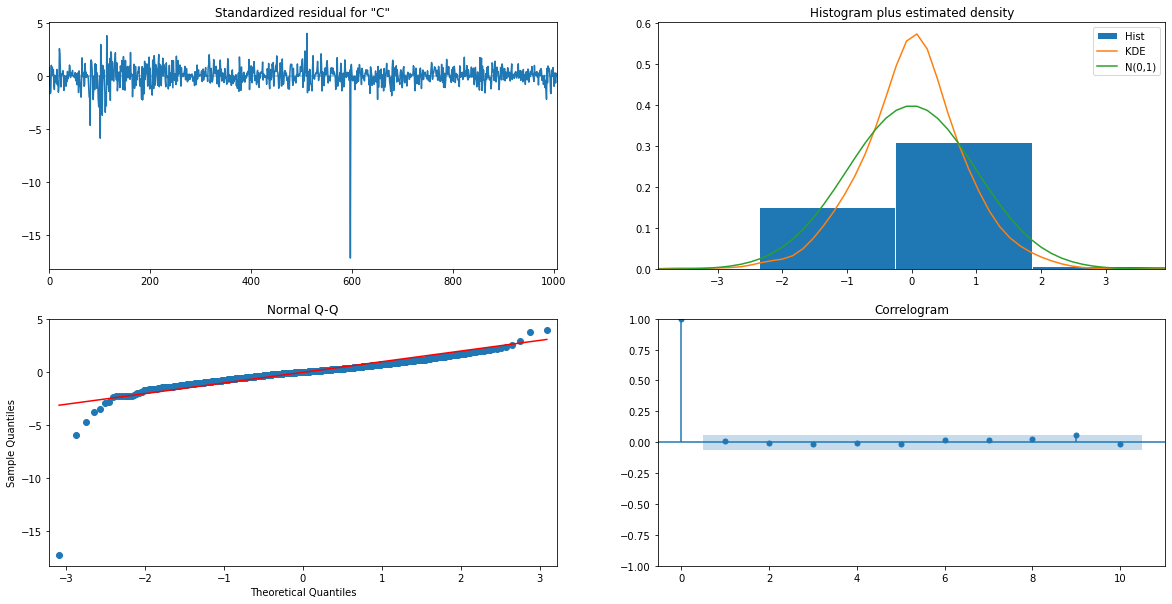

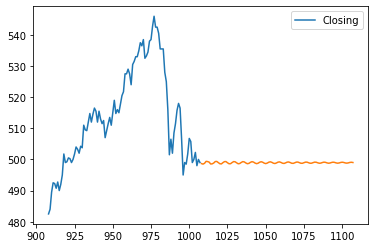

In [72]:
model = SARIMAX(df["Closing"], order=(4, 1, 4)).fit()
model.plot_diagnostics(figsize=(20, 10));
forecast_values = model.get_forecast(steps=100)
df.iloc[-100:].plot(y="Closing")
forecast_values.predicted_mean.plot();